In [2]:
# Crypto Risk & Correlation Analysis - Data Sourcing & Cleaning

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

tickers = ["BTC-GBP", "ETH-GBP"]

data = yf.download(tickers,
                   start="2020-01-01",
                   end="2025-12-31",
                   interval="1d")

[*********************100%***********************]  2 of 2 completed


In [3]:
data.head()

Price             Close                     High                      Low  \
Ticker          BTC-GBP     ETH-GBP      BTC-GBP     ETH-GBP      BTC-GBP   
Date                                                                        
2020-01-01  5433.849121   98.714050  5472.485840  100.102066  5407.095215   
2020-01-02  5313.357910   96.912010  5437.121094   98.727661  5277.165039   
2020-01-03  5615.142090  102.573875  5662.306641  102.866142  5263.736328   
2020-01-04  5665.424805  103.260132  5678.214355  104.011894  5588.101562   
2020-01-05  5666.796875  104.199127  5764.659668  106.521660  5659.478027   

Price                          Open                   Volume              
Ticker         ETH-GBP      BTC-GBP     ETH-GBP      BTC-GBP     ETH-GBP  
Date                                                                      
2020-01-01   97.467186  5425.667969   97.754478  14011191757  5988583431  
2020-01-02   96.602150  5435.643066   98.727661  15822688746  6109919641  
2020-01-03   96.284966  5312.565918   96.912827  21491142914  8009516846  
2020-01-04  101.709099  5615.517578  102.571434  14100590057  5680904209  
2020-01-05  103.241982  5665.268066  103.262215  15082067804  5755001349

In [4]:
#close prices were used to measure returns because crypto doesn’t have dividends or splits. Close prices are also best standard for returns

prices = data["Close"].copy()
prices.columns = ["BTC", "ETH"]
prices

,BTC,ETH
Date,,
2020-01-01,5433.849121,98.714050
2020-01-02,5313.357910,96.912010
2020-01-03,5615.142090,102.573875
2020-01-04,5665.424805,103.260132
2020-01-05,5666.796875,104.199127
...,...,...
2025-12-26,64659.804688,2166.953613
2025-12-27,65038.656250,2183.703125
2025-12-28,65077.304688,2184.585205


In [5]:
# Sanity checking to ensure: No NaNs, No Zeros, sensible magnitudes and expected long-term shape
prices.info()
prices.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2020-01-01 to 2025-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     2191 non-null   float64
 1   ETH     2191 non-null   float64
dtypes: float64(2)
memory usage: 51.4 KB


,BTC,ETH
count,2191.000000,2191.000000
mean,36215.502109,1665.202337
std,23677.748099,882.521027
min,3954.907959,89.386742
25%,18228.054688,1192.804871
50%,30302.574219,1597.368530
75%,50639.482422,2344.560913
max,92515.351562,3572.164062


<Axes: title={'center': 'BTC vs ETH Prices (GBP)'}, xlabel='Date'>

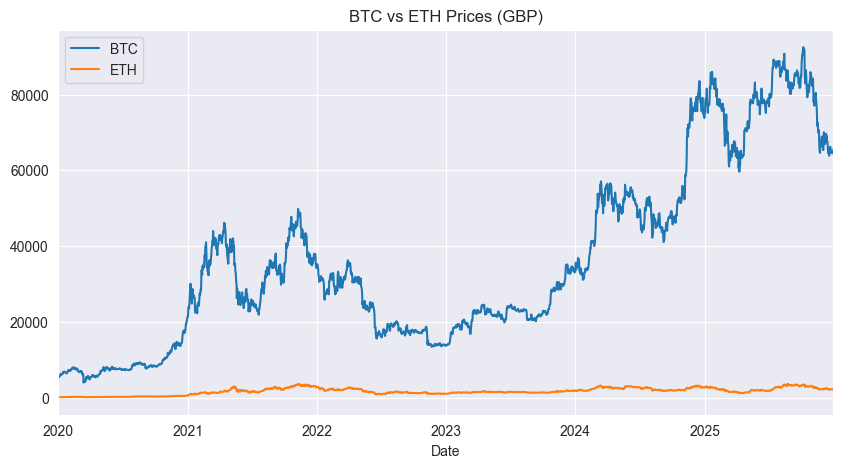

In [6]:
 # Prices are denominated in GBP; however, return-based analysis is invariant to currency scaling
prices.plot(figsize=(10,5), title="BTC vs ETH Prices (GBP)")


In [7]:
# Transforming closed prices into returns
log_prices = np.log(prices)
returns = log_prices.diff().dropna()
returns.head()


,BTC,ETH
Date,,
2020-01-02,-0.022424,-0.018424
2020-01-03,0.055243,0.056780
2020-01-04,0.008915,0.006668
2020-01-05,0.000242,0.009052
2020-01-06,0.040077,0.050151


In [8]:
returns.describe()

,BTC,ETH
count,2190.000000,2190.000000
mean,0.001138,0.001419
std,0.031833,0.042715
min,-0.445169,-0.531171
25%,-0.012522,-0.017606
50%,0.000471,0.001359
75%,0.015239,0.021459
max,0.178935,0.230085


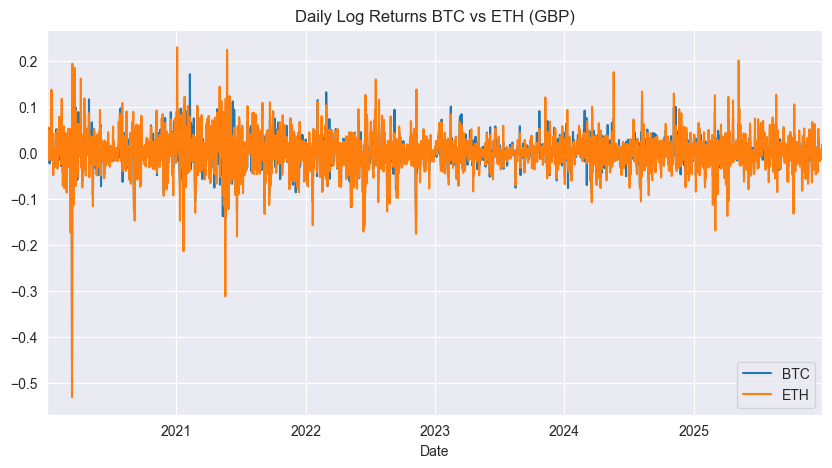

In [9]:
returns.plot(figsize=(10,5), title="Daily Log Returns BTC vs ETH (GBP)")
plt.show()

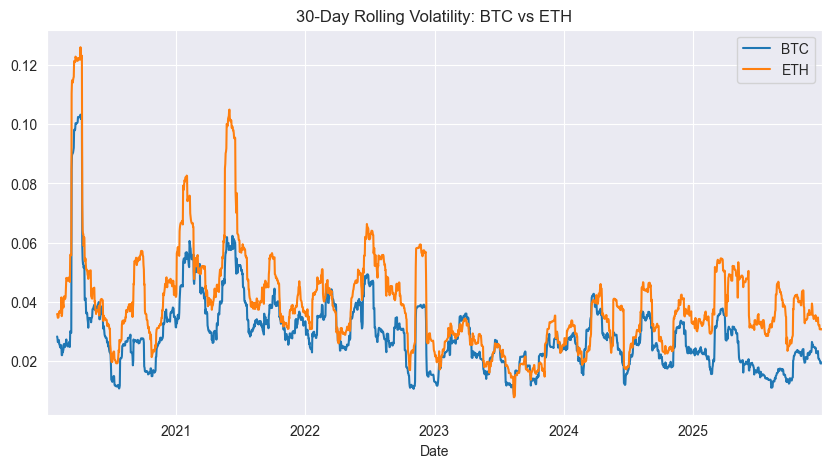

In [10]:
# Turning returns into rolling/daily volatility - volatility by itself can be misleading as it does not account for markets moving through varying periods, so will not show risk clusters in time (info investors can use). Rolling volatility asks how has volatility, and therefore risk, changed over a defined period.

rolling_vol = returns.rolling(window=30).std() # How much does this asset typically move per day, based on the last 30 days of history - how does this look conceptually? is it that you have one data point of daily returns then you compare that to the std of previous 30 days? how will this comparison look like exactly?

rolling_vol.plot(
    figsize=(10,5),
    title="30-Day Rolling Volatility: BTC vs ETH"
)
plt.show()


# ROLLING VOL SUMMARY:
# ETH exhibits higher volatility than BTC

# Volatility clusters occur simultaneously

# Risk is shared in timing, not magnitude


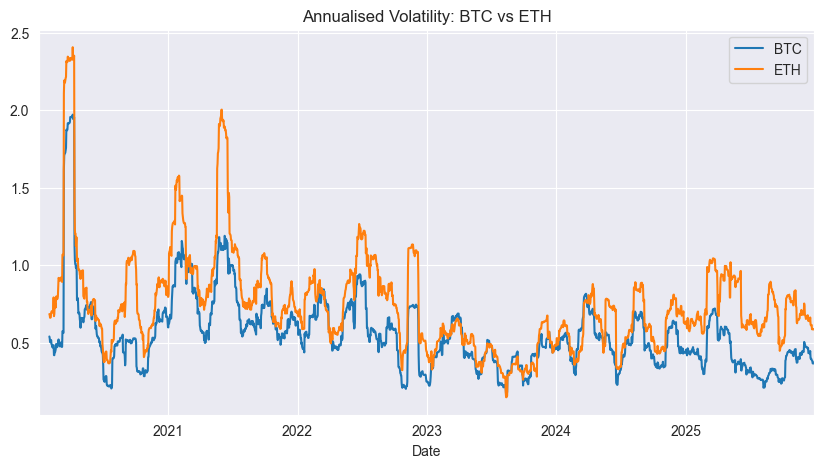

In [11]:
# calculating annualised volatility - easier metric to interpret for decision makers, as assets are normally assesed based on their annual performance

# to scale volatility from daily to yearly we must multiply daily volatility by square root of 365 (because variance scales linearly with time - square root of time rule)
annualised_vol = rolling_vol * np.sqrt(365)

annualised_vol.plot(figsize=(10,5),
    title="Annualised Volatility: BTC vs ETH"
)
plt.show()


Ethereum exhibits consistently higher rolling volatility than Bitcoin across most of the sample period, indicating greater day-to-day price variability. While volatility regimes appear to be shared between the two assets, Ethereum demonstrates larger volatility spikes, suggesting a higher standalone risk profile. This is also pattern is also mirrored when comparing annualised volatility between the two assets

In [12]:
# Identifying correlation between BTC and ETH to see if they behave too similarly to provide diversification benefits

returns.corr() # shows a static correlation between the assets, suggesting limited diversification benefits

,BTC,ETH
BTC,1.000000,0.821154
ETH,0.821154,1.000000


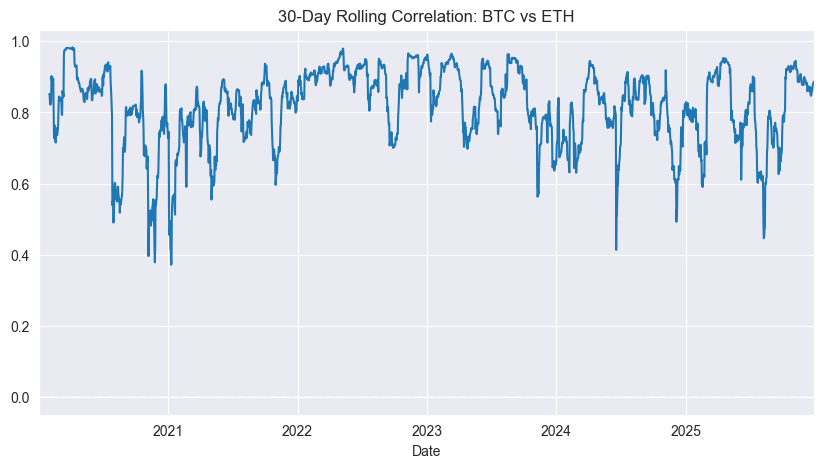

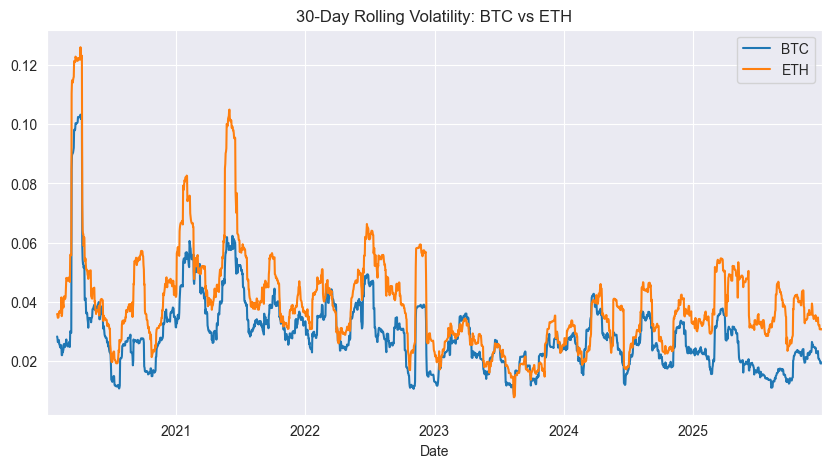

In [13]:
# static correlation fails to account for compartmentalised correlation changes over time, and rises during stress - correlation clustering. Must look at rolling correlation

rolling_corr = (returns["BTC"].rolling(window=30).corr(returns["ETH"])) # was std not used here because in previous code it was used, we were calculating volatility, whereas here we are calculating correlations in between asset returns ?
rolling_corr.plot(
    figsize=(10,5),
    title="30-Day Rolling Correlation: BTC vs ETH"
)
plt.axhline(0, color="white", linestyle="--", alpha=0.5)

rolling_vol.plot(
    figsize=(10,5),
    title="30-Day Rolling Volatility: BTC vs ETH"
)
plt.show()

# 30 DAY CORR SUMMARY:
# Correlation remains structurally high

#Stress periods push correlation toward 1

# Correlation mean-reverts upward after dips

Rolling correlation analysis indicates that the correlation between Bitcoin and Ethereum returns is persistently high, rarely falling below 0.6 and exhibiting sustained periods near 0.9. This reflects strong co-movement across most market conditions and suggests limited diversification potential, as assets that provide meaningful diversification typically exhibit correlations closer to 0–0.3. Although correlation is time-varying, declines tend to be short-lived and quickly mean-revert to elevated levels, indicating that Bitcoin and Ethereum share common underlying risk drivers.

This co-movement is further reinforced by rolling volatility analysis. While Ethereum consistently exhibits higher volatility than Bitcoin, changes in volatility occur in tandem across both assets. During periods of elevated volatility, correlation between Bitcoin and Ethereum also increases, implying that diversification benefits diminish during market stress. Although the two assets differ in the magnitude of risk, they do not differ meaningfully in the direction of risk, limiting their effectiveness as independent diversification instruments within a portfolio.

Stress periods are times when volatility is abnormally high and uncertainty is elevated. Here we will define stress periods as periods when BTC volatility is in the top 25% of its historical distribution (upper quartile?). We use BTC to define stress periods because it is the asset with the largest market cap, and it serves as a proxy for overall market stress for crypto assets.

In [14]:
btc_vol = rolling_vol["BTC"] # getting only BTC rolling vol values

threshold = btc_vol.quantile(0.75) # getting a value that represent 75% of max vol value

stress_periods = btc_vol > threshold # show true for all btc rows with rolling vol greater than threshold



In [15]:
stress_corr_df = pd.DataFrame({
    "correlation": rolling_corr,
    "stress": stress_periods
})

stress_corr_df = stress_corr_df.dropna()
stress_corr_df

,correlation,stress
Date,,
2020-01-31,0.852036,False
2020-02-01,0.845948,False
2020-02-02,0.822305,False
2020-02-03,0.822056,False
2020-02-04,0.823417,False
...,...,...
2025-12-26,0.874599,False
2025-12-27,0.881273,False
2025-12-28,0.883255,False


In [16]:
stress_corr_df.groupby("stress")["correlation"].mean()


stress
False    0.802136
True     0.856291
Name: correlation, dtype: float64

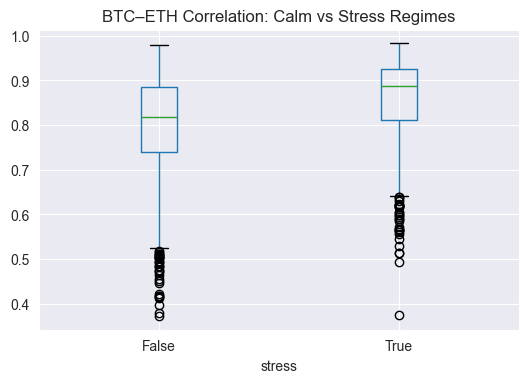

In [17]:

stress_corr_df.boxplot(column="correlation", by="stress", figsize=(6,4))
plt.suptitle("")
plt.title("BTC–ETH Correlation: Calm vs Stress Regimes")
plt.show()

# BOX PLOT SUMMARY:

# Median correlation rises modestly

# Distribution compresses upward during stress

# Low-correlation outcomes become rare


- Correlation is structurally higher during stress
- Diversification benefits collapse when volatility spikes
- ETH does not hedge BTC risk in stress regimes


Stress regimes were defined as periods in which Bitcoin’s rolling volatility exceeded its 75th percentile. During these periods, the average rolling correlation between Bitcoin and Ethereum increased materially relative to calm regimes. This indicates that co-movement between the two assets intensifies during market stress, reducing diversification benefits precisely when risk is elevated.

The box blot illustrates this through the higher median value (0.89) and smaller IQR during stress, compared to calm regimes (50% of correlation values are closer closer to the higher median value. Fundamentally, in times of risk where diversification matters most, it collapses - “When risk arrives, BTC and ETH behave like one asset.”

In [18]:
mask = stress_corr_df["stress"] == True
stress_corr_df[mask]["correlation"].describe

<bound method NDFrame.describe of Date
2020-03-12    0.957756
2020-03-13    0.973910
2020-03-14    0.974771
2020-03-15    0.976246
2020-03-16    0.975368
                ...   
2025-03-27    0.919335
2025-03-28    0.917593
2025-03-29    0.919557
2025-03-30    0.921816
2025-03-31    0.927939
Name: correlation, Length: 540, dtype: float64>

In [19]:
mask

Date
2020-01-31    False
2020-02-01    False
2020-02-02    False
2020-02-03    False
2020-02-04    False
              ...  
2025-12-26    False
2025-12-27    False
2025-12-28    False
2025-12-29    False
2025-12-30    False
Name: stress, Length: 2161, dtype: bool

**What was happening in the world during those stress periods?**

During periods of elevated market stress — often coinciding with macroeconomic shocks or crypto-specific events — BTC and ETH exhibit sharply increased correlation and volatility. This suggests that while the assets differ structurally, they are driven by shared systemic risk factors during periods of uncertainty. As a result, diversification benefits between BTC and ETH diminish precisely during drawdown regimes, limiting their effectiveness as independent risk assets.

make sure to annotate volatility graph with names of world events happening during these periods i.e:
- March 2020 — COVID liquidity shock
- Nov 2022 — FTX collapse
- 2023–2024 — ETF approval speculation
- 2022–2023 — Global tightening cycle

In [20]:
# exporting dataframes as csv for tableau visualisations

prices.to_csv("BTC-ETH_Prices.csv")
rolling_vol.to_csv("BTC-ETH_Volatility.csv")
rolling_corr.to_csv("BTC-ETH_Correlation.csv")
stress_corr_df.to_csv("BTC-ETH_Stress.csv")

In [21]:
# combining the above data frames
final_df = prices.copy()

final_df["BTC_vol"] = rolling_vol["BTC"]
final_df["ETH_vol"] = rolling_vol["ETH"]
final_df["rolling_corr"] = rolling_corr
final_df["stress"] = stress_periods


In [22]:
final_df

,BTC,ETH,BTC_vol,ETH_vol,rolling_corr,stress
Date,,,,,,
2020-01-01,5433.849121,98.714050,NaN,NaN,NaN,NaN
2020-01-02,5313.357910,96.912010,NaN,NaN,NaN,False
2020-01-03,5615.142090,102.573875,NaN,NaN,NaN,False
2020-01-04,5665.424805,103.260132,NaN,NaN,NaN,False
2020-01-05,5666.796875,104.199127,NaN,NaN,NaN,False
...,...,...,...,...,...,...
2025-12-26,64659.804688,2166.953613,0.019218,0.030705,0.874599,False
2025-12-27,65038.656250,2183.703125,0.019170,0.030750,0.881273,False
2025-12-28,65077.304688,2184.585205,0.019171,0.030722,0.883255,False


In [23]:
# exporting final dataframe as a csv to create visualisations in tableau

final_df.to_csv("btc_eth_portfolio_analysis.csv")
